In [3]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/mahmoud/nltk_data...


True

In [5]:
pip install wordcloud

     |████████████████████████████████| 159 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import plotly.express as px
import seaborn as sns
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [21]:
df = pd.read_csv('/Users/mahmoud/Car_Price_Prediction/modeling_update.csv')

In [22]:
df = df.drop(columns=['Unnamed: 0'])
df

,Mileage,Dealer Rating,Review Count,Price,Badge Label,Car Rating,Accidents or damage,1-owner vehicle,Personal use only,Open recall,...,Type_xDrive30i,Type_xDrive35d,Type_xDrive35i,Type_xDrive35i Premium,Type_xDrive50i,Type_xi,Processed_Reviews,Review_Length,Num_Exclamation_Marks,Age
0,92124.0,4.200000,672.0,14359.0,3,4.2,0,0.0,1.0,0,...,0,0,0,0,0,0,tommy san antonio car car way rat transmission...,328,0,7
1,111488.0,4.200000,672.0,13517.0,2,4.2,1,1.0,1.0,1,...,0,0,0,0,0,0,leo appreciate great ride usa car enclave grea...,469,0,8
2,133821.0,3.849628,77.0,9995.0,4,4.5,0,0.0,0.0,0,...,0,0,0,0,0,0,cattayl chatsworth car suv last week new jgc m...,739,0,11
3,116643.0,4.800000,220.0,9999.0,3,5.0,1,1.0,1.0,0,...,0,0,0,0,0,0,pauline st bernard car wish get toyota camry g...,937,0,13
4,111588.0,4.800000,220.0,13499.0,3,5.0,1,0.0,1.0,0,...,0,0,0,0,0,0,la vegas car feel proud wheel mazda sport driv...,1046,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,15035.0,3.849628,0.0,13999.0,2,4.9,1,0.0,0.0,0,...,0,0,0,0,0,0,lackeymo neosho car please new car struggle an...,133,0,2
9706,154352.0,3.849628,0.0,6524.0,4,5.0,1,0.0,1.0,0,...,0,0,0,0,0,0,kc whittier car long distance driver well shor...,464,0,17
9707,46460.0,3.849628,0.0,8924.0,4,4.9,0,0.0,1.0,0,...,0,0,0,0,0,0,lee dayton ohio car say wonderful vehicle get ...,497,0,15
9708,152296.0,3.849628,0.0,8643.0,3,5.0,1,0.0,1.0,0,...,0,0,0,0,0,0,adelaide car love car interior exterior design...,318,0,9


In [13]:
def process_doc(doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None


        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok.lower() not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [14]:
df['Processed_Reviews'] = df['Processed_Reviews'].apply(process_doc)

In [15]:
df['Processed_Reviews'][0]

'tommy san antonio car car way rat transmission sluggish delay satisfy hidden finance charge total sixteen customer service worse service ever car buy car year ago problem drive mile comfortable ride nice performance highway definitely recommend car great look fun drive glad instead screen block view lovely interior great sound'

In [30]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
corpus = df['Processed_Reviews']

In [32]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(corpus)
X_train

<9710x12596 sparse matrix of type '<class 'numpy.float64'>'
	with 760486 stored elements in Compressed Sparse Row format>

In [33]:
topic_model = NMF(n_components=5,max_iter=1000)
topic_model.fit(X_train)

NMF(max_iter=1000, n_components=5)

In [34]:
H = topic_model.transform(X_train)

W = topic_model.components_

print(f'Shape of W is {W.shape}')
print(f'Shape of H is {H.shape}')
print(f'Shape of X_train {X_train.shape}')

Shape of W is (5, 12596)
Shape of H is (9710, 5)
Shape of X_train (9710, 12596)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
for index, topic in enumerate(W):
    print(f'The top 10 words for topic #{index}')
    print([vec.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

The top 10 words for topic #0
['fuel', 'seat', 'year', 'come', 'never', 'see', 'little', 'make', 'well', 'suzuki', 'need', 'snow', 'gas', 'buy', 'ive', 'problem', 'change', 'reliable', 'look', 'oil', 'love', 'bmw', 'good', 'handle', 'drive', 'vehicle', 'great', 'get', 'mile', 'car']


The top 10 words for topic #1
['negotiate', 'overhaul', 'toyotas', 'mccarthy', 'shawnee', 'lotz', 'princeville', 'frostedbarrys', 'use', 'love', 'price', 'get', 'fix', 'need', 'dealership', 'bump', 'fusion', 'repair', 'mechanic', 'gear', 'poor', 'forward', 'burn', 'service', 'horrible', 'screw', 'pay', 'car', 'honda', 'ford']


The top 10 words for topic #2
['seal', 'liter', 'sonata', 'dry', 'heard', 'competitor', 'turner', 'idle', 'particularly', 'develop', 'prestige', 'ahmad', 'perrigan', 'christiansburg', 'haysi', 'ferrell', 'awad', 'amman', 'shutting', 'take', 'consumption', 'transmission', 'power', 'leak', 'car', 'eco', 'boost', 'engine', 'ruth', 'fluid']


The top 10 words for topic #3
['become', 't

In [38]:
topic_name_dict = {0: "Low Importance", 1: "Medium Importance", 2: "High Importance", 
                   3: "Very High Importance", 4: "Critical Importance"}

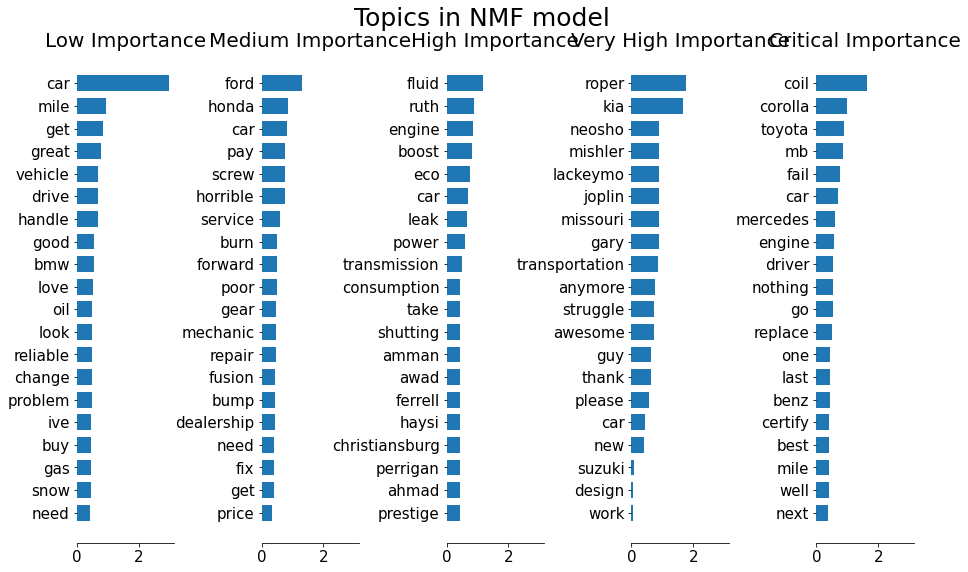

In [42]:
def plot_top_words(W, feature_names, n_top_words, title, topic_names):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(topic_names[topic_idx], fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vec.get_feature_names()  
topic_name_dict = {0: "Low Importance", 1: "Medium Importance", 2: "High Importance", 
                   3: "Very High Importance", 4: "Critical Importance"}

plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model", topic_name_dict)


In [48]:
from gensim import corpora, models

tokenized_docs = df['Processed_Reviews'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Create an LDA model with 5 topics
num_topics = 5
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

for topic_num, words in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"Topic {topic_num + 1}: {' '.join(word for word, _ in words)}")


Topic 1: car mile great buy drive year handle get well work
Topic 2: car get ive good change love great use time vehicle
Topic 3: car mile vehicle drive coil get engine first make well
Topic 4: car engine power fluid great problem eco take leak recommend
Topic 5: car mile get ford go transmission buy drive pay love


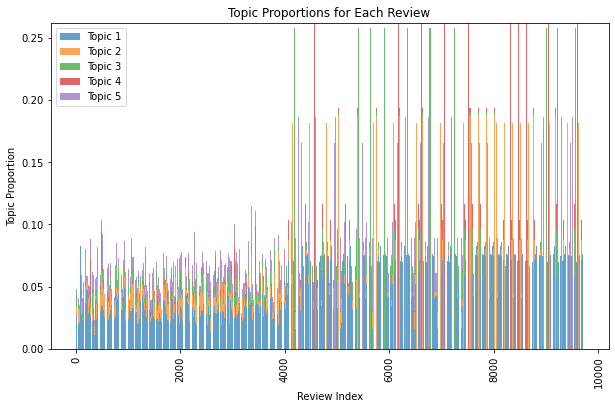

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already obtained the topic distributions in the variable 'H'
# H contains the topic proportions for each review

# Convert the topic proportions into a DataFrame
topic_proportions_df = pd.DataFrame(H, columns=[f"Topic {i+1}" for i in range(H.shape[1])])

# Assuming your original DataFrame is named 'df' and it contains the reviews and other information
# Add the topic proportions DataFrame to the original DataFrame
df_with_topics = pd.concat([df, topic_proportions_df], axis=1)

# Visualize the topic proportions for each review
num_topics = H.shape[1]
review_indices = df_with_topics.index

# Plot the stacked bar chart for each review
plt.figure(figsize=(10, 6))
bottom = [0] * len(df_with_topics)
for i in range(num_topics):
    plt.bar(review_indices, df_with_topics[f"Topic {i+1}"], bottom=bottom, label=f"Topic {i+1}", alpha=0.7)
    bottom += df_with_topics[f"Topic {i+1}"]

plt.xlabel("Review Index")
plt.ylabel("Topic Proportion")
plt.title("Topic Proportions for Each Review")
plt.legend()
plt.xticks(rotation=90)
plt.show()
